In [1]:
import matplotlib.pyplot as plt
from pprint import pprint
import torch
import torch.nn.functional as F

%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set(str().join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}
pprint(itos)

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}


In [5]:
BLOCK_SIZE = 3
X_data, Y_data = [], []
number_of_examples = 0

for k, word in enumerate(words[:5]):
    print(f'Word {k}: {word}')
    context = [0 for _ in range(BLOCK_SIZE)]
    for ch in word + '.':
        ix = stoi[ch]

        X_data.append(context)
        Y_data.append(ix)

        print(f'\t{str().join(itos[i] for i in context)} ---> {itos[ix]}')

        context = context[1:] + [ix]

        number_of_examples += 1

X = torch.tensor(X_data)
Y = torch.tensor(Y_data)
print(f'Number of examples: {number_of_examples}')

Word 0: emma
	... ---> e
	..e ---> m
	.em ---> m
	emm ---> a
	mma ---> .
Word 1: olivia
	... ---> o
	..o ---> l
	.ol ---> i
	oli ---> v
	liv ---> i
	ivi ---> a
	via ---> .
Word 2: ava
	... ---> a
	..a ---> v
	.av ---> a
	ava ---> .
Word 3: isabella
	... ---> i
	..i ---> s
	.is ---> a
	isa ---> b
	sab ---> e
	abe ---> l
	bel ---> l
	ell ---> a
	lla ---> .
Word 4: sophia
	... ---> s
	..s ---> o
	.so ---> p
	sop ---> h
	oph ---> i
	phi ---> a
	hia ---> .
Number of examples: 32


In [6]:
print(f'{X.shape=}, {X.dtype=}, {Y.shape=}, {Y.dtype=} ')

X.shape=torch.Size([32, 3]), X.dtype=torch.int64, Y.shape=torch.Size([32]), Y.dtype=torch.int64 


In [7]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [8]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [9]:
C = torch.rand((27, 2))
C

tensor([[0.0346, 0.1787],
        [0.3052, 0.3925],
        [0.8254, 0.0374],
        [0.7601, 0.5619],
        [0.5155, 0.4165],
        [0.0133, 0.4526],
        [0.9665, 0.8718],
        [0.1934, 0.1885],
        [0.0078, 0.4848],
        [0.4139, 0.3038],
        [0.6099, 0.6931],
        [0.9758, 0.1806],
        [0.8307, 0.9311],
        [0.3635, 0.8566],
        [0.1165, 0.4171],
        [0.4254, 0.6861],
        [0.6385, 0.9800],
        [0.5522, 0.5696],
        [0.6032, 0.4673],
        [0.5420, 0.0213],
        [0.0143, 0.9048],
        [0.5675, 0.1697],
        [0.5388, 0.6220],
        [0.2306, 0.2358],
        [0.6349, 0.5524],
        [0.6390, 0.2463],
        [0.5726, 0.1442]])

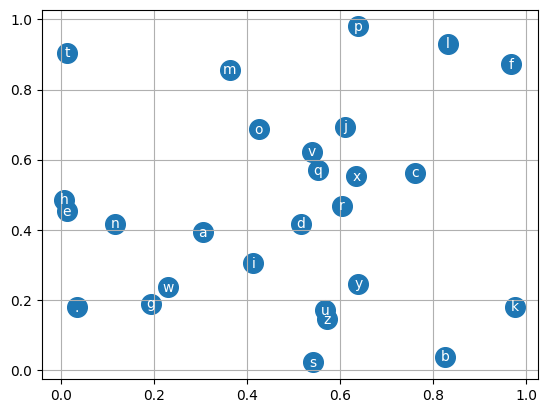

In [10]:
plt.figure()
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid()
plt.show()

In [11]:
C[5]

tensor([0.0133, 0.4526])

In [12]:
F.one_hot(torch.tensor(5), num_classes=27).float()

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
# Same as C[5]
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.0133, 0.4526])

In [14]:
C.shape

torch.Size([27, 2])

In [15]:
C[X]

tensor([[[0.0346, 0.1787],
         [0.0346, 0.1787],
         [0.0346, 0.1787]],

        [[0.0346, 0.1787],
         [0.0346, 0.1787],
         [0.0133, 0.4526]],

        [[0.0346, 0.1787],
         [0.0133, 0.4526],
         [0.3635, 0.8566]],

        [[0.0133, 0.4526],
         [0.3635, 0.8566],
         [0.3635, 0.8566]],

        [[0.3635, 0.8566],
         [0.3635, 0.8566],
         [0.3052, 0.3925]],

        [[0.0346, 0.1787],
         [0.0346, 0.1787],
         [0.0346, 0.1787]],

        [[0.0346, 0.1787],
         [0.0346, 0.1787],
         [0.4254, 0.6861]],

        [[0.0346, 0.1787],
         [0.4254, 0.6861],
         [0.8307, 0.9311]],

        [[0.4254, 0.6861],
         [0.8307, 0.9311],
         [0.4139, 0.3038]],

        [[0.8307, 0.9311],
         [0.4139, 0.3038],
         [0.5388, 0.6220]],

        [[0.4139, 0.3038],
         [0.5388, 0.6220],
         [0.4139, 0.3038]],

        [[0.5388, 0.6220],
         [0.4139, 0.3038],
         [0.3052, 0.3925]],

    

In [16]:
print(f'{C.shape=}, {X.shape=}, {C[X].shape=}')

C.shape=torch.Size([27, 2]), X.shape=torch.Size([32, 3]), C[X].shape=torch.Size([32, 3, 2])


In [17]:
X[13, 2]

tensor(1)

In [18]:
C[X][13, 2]

tensor([0.3052, 0.3925])

In [19]:
C[1]

tensor([0.3052, 0.3925])

In [20]:
# Embedding
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [21]:
# Hidden layer weights and biases.
# 6 rows corresponds to
#     (3 columns of X) * (2 columns of C) = 6 columns
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [22]:
# To transform emb to a 32x6 tensor, we can use torch.cat to concatenate along
# dimension 1, which concatenates three 32x2 tensors together along dimension 1,
# producing a 32x6 tensor:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [23]:
# Note that we can get [emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]] by using
# torch.unbind to get a list of tensors across dimension 1:
len(torch.unbind(emb, 1))

3

In [24]:
# Then we can concatenate the list of tensors across dimension 1:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [25]:
# We can also use the view method to reshape the tensor (very efficient):
emb.view(32, 6).shape

torch.Size([32, 6])

In [26]:
# Both methods of producing the 32x6 tensor are equivalent:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [27]:
# Implementing the hidden later
h = emb.view(32, 6) @ W1 + b1
h.shape

torch.Size([32, 100])

In [28]:
h

tensor([[ 5.0071e-01,  9.6898e-01,  7.2293e-02,  ..., -4.5206e-01,
         -1.3481e-01, -9.4844e-01],
        [ 6.6163e-01,  9.7442e-01,  3.4292e-01,  ...,  2.5040e-04,
          5.4367e-02, -1.5159e+00],
        [ 7.7525e-01,  2.0407e+00,  1.2218e+00,  ...,  5.7908e-01,
          1.7784e-01, -2.3581e+00],
        ...,
        [ 4.2911e-02,  6.1264e-01,  1.5079e+00,  ..., -1.3814e+00,
         -9.0853e-01, -4.8810e-01],
        [-2.6955e-01,  3.0276e+00,  7.5026e-01,  ..., -1.6085e+00,
         -6.6044e-01, -1.2190e+00],
        [ 2.5555e-01,  9.9251e-01,  4.7553e-01,  ..., -6.8121e-02,
         -6.1484e-01, -1.1961e+00]])

In [29]:
# Same as above but without hard-coding the number of rows in the view
h = emb.view(emb.shape[0], 6) @ W1 + b1
h.shape

torch.Size([32, 100])

In [30]:
# Same as above but letting PyTorch figure out how many rows should be in the
# view
h = emb.view(-1, 6) @ W1 + b1
h.shape

torch.Size([32, 100])

In [31]:
# We can also apply activation function
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h.shape

torch.Size([32, 100])

In [32]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [33]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [34]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs.shape

torch.Size([32, 27])

In [35]:
print(f'Each row sums to 1:\n{probs.sum(1)=}')

Each row sums to 1:
probs.sum(1)=tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [36]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [37]:
probs[torch.arange(32), Y]

tensor([2.7676e-07, 1.7783e-01, 6.7574e-03, 5.8884e-03, 4.1005e-05, 1.9555e-09,
        7.4956e-06, 1.2306e-11, 6.8444e-05, 6.9070e-12, 2.0581e-06, 1.6448e-04,
        3.7687e-05, 1.2464e-02, 4.3816e-05, 2.9074e-05, 2.5614e-11, 4.0830e-07,
        1.7076e-07, 1.2047e-03, 3.4368e-08, 3.0977e-09, 1.8563e-07, 9.2256e-04,
        3.7179e-06, 5.6840e-04, 5.8707e-10, 7.4001e-12, 5.7977e-12, 4.0536e-15,
        2.2857e-06, 2.8679e-06])

In [38]:
# This is what the above cell is doing:
print(f'{probs[0, 5]=}, {probs[1, 13]=}, {probs[2, 13]=}, ...')

probs[0, 5]=tensor(2.7676e-07), probs[1, 13]=tensor(0.1778), probs[2, 13]=tensor(0.0068), ...


In [39]:
loss = - (probs[torch.arange(32), Y].log().mean())
loss

tensor(14.3274)

## Summary of what we just did

In [40]:
# Parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]
print(f'Total parameters: {sum(p.nelement() for p in parameters)}')

Total parameters: 3481


In [41]:
# Forward pass
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
loss = -(probs[torch.arange(32), Y].log().mean())
print(f'Loss: {loss.item():.4f}')

Loss: 17.7697


In [42]:
# What we are doing is cross-entropy, which PyTorch has a function for:
F.cross_entropy(logits, Y)

tensor(17.7697)

In [43]:
for p in parameters:
    p.requires_grad = True

In [44]:
LEARNING_RATE = 0.01

for k in range(100):
    # Forward pass
    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)

    print(f'Iteration: {k}, Loss: {loss.item():.4f}')

    # Backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # Update parameters
    for p in parameters:
        p.data += - LEARNING_RATE * p.grad

Iteration: 0, Loss: 17.7697
Iteration: 1, Loss: 17.0792
Iteration: 2, Loss: 16.5319
Iteration: 3, Loss: 16.0857
Iteration: 4, Loss: 15.6927
Iteration: 5, Loss: 15.3323
Iteration: 6, Loss: 14.9940
Iteration: 7, Loss: 14.6720
Iteration: 8, Loss: 14.3625
Iteration: 9, Loss: 14.0635
Iteration: 10, Loss: 13.7737
Iteration: 11, Loss: 13.4925
Iteration: 12, Loss: 13.2197
Iteration: 13, Loss: 12.9554
Iteration: 14, Loss: 12.6995
Iteration: 15, Loss: 12.4521
Iteration: 16, Loss: 12.2130
Iteration: 17, Loss: 11.9818
Iteration: 18, Loss: 11.7580
Iteration: 19, Loss: 11.5410
Iteration: 20, Loss: 11.3303
Iteration: 21, Loss: 11.1254
Iteration: 22, Loss: 10.9257
Iteration: 23, Loss: 10.7311
Iteration: 24, Loss: 10.5411
Iteration: 25, Loss: 10.3555
Iteration: 26, Loss: 10.1741
Iteration: 27, Loss: 9.9967
Iteration: 28, Loss: 9.8232
Iteration: 29, Loss: 9.6535
Iteration: 30, Loss: 9.4874
Iteration: 31, Loss: 9.3248
Iteration: 32, Loss: 9.1657
Iteration: 33, Loss: 9.0098
Iteration: 34, Loss: 8.8573
Ite

## Iterating on the entire dataset

In [45]:
# We can take batches of the dataset to speed up each iteration of the neural
# network training
batch_ix = torch.randint(0, X.shape[0], (10,))
batch_ix

tensor([ 4,  6, 24, 14, 13,  8, 16,  3,  2,  4])

In [46]:
BLOCK_SIZE = 3
X_data, Y_data = [], []
number_of_examples = 0

for word in words:
    context = [0 for _ in range(BLOCK_SIZE)]
    for ch in word + '.':
        ix = stoi[ch]

        X_data.append(context)
        Y_data.append(ix)

        context = context[1:] + [ix]

        number_of_examples += 1

X = torch.tensor(X_data)
Y = torch.tensor(Y_data)
print(f'Number of examples: {number_of_examples}')

Number of examples: 228146


In [47]:
X[batch_ix]

tensor([[13, 13,  1],
        [ 0,  0, 15],
        [12, 12,  1],
        [ 0,  1, 22],
        [ 0,  0,  1],
        [15, 12,  9],
        [ 0,  0,  0],
        [ 5, 13, 13],
        [ 0,  5, 13],
        [13, 13,  1]])

In [48]:
Y[batch_ix]

tensor([ 0, 12,  0,  1, 22, 22,  9,  1, 13,  0])

In [49]:
# Parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

print(f'Total parameters: {sum(p.nelement() for p in parameters)}')

Total parameters: 3481


In [50]:
LEARNING_RATE = 0.1
BATCH_SIZE = 50

for k in range(100):
    # Batch
    batch_ix = torch.randint(0, X.shape[0], (BATCH_SIZE,))

    # Forward pass
    emb = C[X[batch_ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[batch_ix])

    print(f'Iteration: {k}, Loss: {loss.item():.4f}')

    # Backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # Update parameters
    for p in parameters:
        p.data += - LEARNING_RATE * p.grad

Iteration: 0, Loss: 19.5549
Iteration: 1, Loss: 17.6606
Iteration: 2, Loss: 16.9659
Iteration: 3, Loss: 12.1113
Iteration: 4, Loss: 13.4687
Iteration: 5, Loss: 15.0449
Iteration: 6, Loss: 13.3143
Iteration: 7, Loss: 12.4386
Iteration: 8, Loss: 12.6484
Iteration: 9, Loss: 11.6108
Iteration: 10, Loss: 11.4156
Iteration: 11, Loss: 11.8635
Iteration: 12, Loss: 9.6465
Iteration: 13, Loss: 11.4847
Iteration: 14, Loss: 8.7103
Iteration: 15, Loss: 10.8129
Iteration: 16, Loss: 9.4992
Iteration: 17, Loss: 9.8045
Iteration: 18, Loss: 6.8201
Iteration: 19, Loss: 7.2073
Iteration: 20, Loss: 7.6906
Iteration: 21, Loss: 7.3416
Iteration: 22, Loss: 8.3844
Iteration: 23, Loss: 6.8747
Iteration: 24, Loss: 7.8371
Iteration: 25, Loss: 8.7609
Iteration: 26, Loss: 9.4675
Iteration: 27, Loss: 6.2876
Iteration: 28, Loss: 7.5168
Iteration: 29, Loss: 7.1644
Iteration: 30, Loss: 7.2143
Iteration: 31, Loss: 9.1463
Iteration: 32, Loss: 7.4110
Iteration: 33, Loss: 6.7093
Iteration: 34, Loss: 6.2218
Iteration: 35, L

In [51]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
print(f'Loss of entire dataset: {loss.item():.4f}')

Loss of entire dataset: 3.6865


## Finding a good learning rate

In [52]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs[:10]

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011])

In [53]:
# Parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

lri = []
lossi = []
BATCH_SIZE = 50

for k in range(1000):
    # Batch
    batch_ix = torch.randint(0, X.shape[0], (BATCH_SIZE,))

    # Forward pass
    emb = C[X[batch_ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[batch_ix])

    # Backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # Update parameters
    lr = lrs[k]
    for p in parameters:
        p.data += -lr * p.grad

    lri.append(lre[k])
    lossi.append(loss.item())

print(f'{loss.item()=:.4f}')

loss.item()=7.0703


Text(0, 0.5, 'Loss')

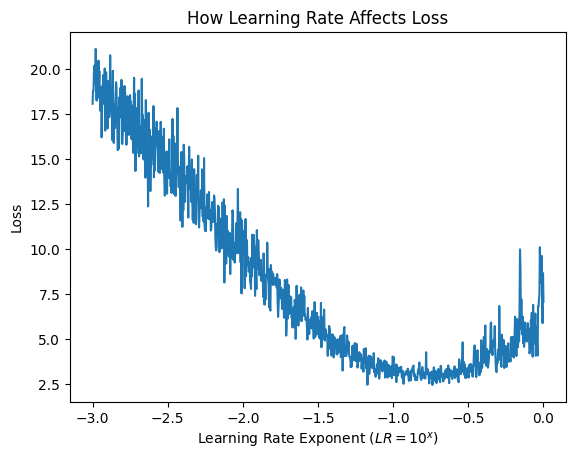

In [54]:
plt.figure()
plt.plot(lri, lossi)
plt.title('How Learning Rate Affects Loss')
plt.xlabel('Learning Rate Exponent ($LR=10^x$)')
plt.ylabel('Loss')

From the plot above, we see that a good learning rate (that minimizes loss) is somewhere between $10^{-1}$ and $10^{-0.5}$ (between $0.1$ and $0.32$).

In [55]:
# Parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

BATCH_SIZE = 50

for k in range(10000):
    # Batch
    batch_ix = torch.randint(0, X.shape[0], (BATCH_SIZE,))

    # Forward pass
    emb = C[X[batch_ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[batch_ix])

    # Backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # Update parameters
    lr = 0.2
    for p in parameters:
        p.data += -lr * p.grad

print(f'{loss.item()=:.4f}')

loss.item()=2.6140


## Splitting Dataset into Training and Testing Data

We can split the dataset so that:
- 80% of the data is used for training
- 10% of the data is used for validation during development and hyperparameter tuning
- 10% of the data is used for testing the performance of the model at the end.

In [56]:
import random
random.seed(42)

def build_dataset(words, block_size):
    X_data, Y_data = [], []
    for word in words:
        context = [0 for _ in range(block_size)]
        for ch in word + '.':
            ix = stoi[ch]

            X_data.append(context)
            Y_data.append(ix)

            context = context[1:] + [ix]

    X = torch.tensor(X_data)
    Y = torch.tensor(Y_data)
    return X, Y

In [57]:
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_tr, Y_tr = build_dataset(words[:n1], BLOCK_SIZE)
X_dev, Y_dev = build_dataset(words[n1:n2], BLOCK_SIZE)
X_te, Y_te = build_dataset(words[n1:], BLOCK_SIZE)

In [58]:
print(f'Out of {len(words)} words:\n\t{n1} words will be used for training,\n\t{n2-n1} words will be used for development validation, and\n\t{len(words)-n2} words will be used for testing.')

Out of 32033 words:
	25626 words will be used for training,
	3203 words will be used for development validation, and
	3204 words will be used for testing.


In [59]:
# Parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True
print(f'Number of parameters: {sum(p.nelement() for p in parameters)}')

BATCH_SIZE = 50

for k in range(30000):
    # Batch
    batch_ix = torch.randint(0, X_tr.shape[0], (BATCH_SIZE,))

    # Forward pass
    emb = C[X_tr[batch_ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_tr[batch_ix])

    if k % 1000 == 0:
        print(f'Iteration: {k}, loss: {loss.item():.4f}')

    # Backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # Update parameters
    lr = 0.2
    for p in parameters:
        p.data += -lr * p.grad

Number of parameters: 3481
Iteration: 0, loss: 20.2886
Iteration: 1000, loss: 2.7515
Iteration: 2000, loss: 2.6811
Iteration: 3000, loss: 2.5935
Iteration: 4000, loss: 2.5762
Iteration: 5000, loss: 2.3904
Iteration: 6000, loss: 2.6526
Iteration: 7000, loss: 2.7502
Iteration: 8000, loss: 2.6157
Iteration: 9000, loss: 2.5028
Iteration: 10000, loss: 2.5373
Iteration: 11000, loss: 2.5824
Iteration: 12000, loss: 2.7138
Iteration: 13000, loss: 2.4773
Iteration: 14000, loss: 2.5923
Iteration: 15000, loss: 2.4509
Iteration: 16000, loss: 2.6298
Iteration: 17000, loss: 2.4137
Iteration: 18000, loss: 2.3082
Iteration: 19000, loss: 2.2534
Iteration: 20000, loss: 2.2482
Iteration: 21000, loss: 2.3985
Iteration: 22000, loss: 2.0010
Iteration: 23000, loss: 2.4931
Iteration: 24000, loss: 2.0901
Iteration: 25000, loss: 2.4276
Iteration: 26000, loss: 2.3070
Iteration: 27000, loss: 2.3406
Iteration: 28000, loss: 2.3287
Iteration: 29000, loss: 2.6899


In [60]:
emb = C[X_tr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_tr)
print(f'Training set loss: {loss:.4f}')

Training set loss: 2.4186


In [61]:
emb = C[X_dev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_dev)
print(f'Development set loss: {loss:.4f}')

Development set loss: 2.4236


The losses of the training and development sets are approximately equal. This means the model is not overfitting.

Let's increase the size of the network (by increasing the hidden layer's size) to see if this result changes.

In [62]:
# Parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True
print(f'Number of parameters: {sum(p.nelement() for p in parameters)}')

lossi = []
BATCH_SIZE = 50

for k in range(30000):
    # Batch
    batch_ix = torch.randint(0, X_tr.shape[0], (BATCH_SIZE,))

    # Forward pass
    emb = C[X_tr[batch_ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_tr[batch_ix])

    lossi.append(loss.item())

    if k % 1000 == 0:
        print(f'Iteration: {k}, loss: {loss.item():.4f}')

    # Backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # Update parameters
    lr = 0.2
    for p in parameters:
        p.data += -lr * p.grad

Number of parameters: 10281
Iteration: 0, loss: 25.4609
Iteration: 1000, loss: 4.7880
Iteration: 2000, loss: 3.5451
Iteration: 3000, loss: 2.5015
Iteration: 4000, loss: 2.4834
Iteration: 5000, loss: 2.4795
Iteration: 6000, loss: 2.8627
Iteration: 7000, loss: 2.6729
Iteration: 8000, loss: 2.3516
Iteration: 9000, loss: 2.3516
Iteration: 10000, loss: 2.7699
Iteration: 11000, loss: 2.3162
Iteration: 12000, loss: 2.9469
Iteration: 13000, loss: 2.8556
Iteration: 14000, loss: 2.2240
Iteration: 15000, loss: 2.5845
Iteration: 16000, loss: 2.5879
Iteration: 17000, loss: 2.6431
Iteration: 18000, loss: 2.7367
Iteration: 19000, loss: 2.4924
Iteration: 20000, loss: 2.6555
Iteration: 21000, loss: 2.7059
Iteration: 22000, loss: 2.7834
Iteration: 23000, loss: 2.3809
Iteration: 24000, loss: 2.8392
Iteration: 25000, loss: 2.5026
Iteration: 26000, loss: 2.4567
Iteration: 27000, loss: 2.2324
Iteration: 28000, loss: 3.0690
Iteration: 29000, loss: 2.7151


In [63]:
emb = C[X_tr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_tr)
print(f'Training set loss: {loss:.4f}')
emb = C[X_dev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_dev)
print(f'Development set loss: {loss:.4f}')

Training set loss: 2.4660
Development set loss: 2.4668


The results are similar to the smaller model, so the bottleneck might not be the size of the network; it might be the embedding vectors of the words.

Text(0, 0.5, 'Loss')

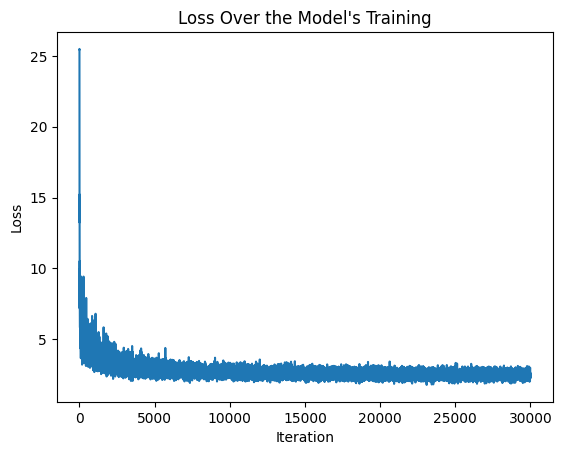

In [64]:
plt.figure()
plt.plot(lossi)
plt.title('Loss Over the Model\'s Training')
plt.xlabel('Iteration')
plt.ylabel('Loss')

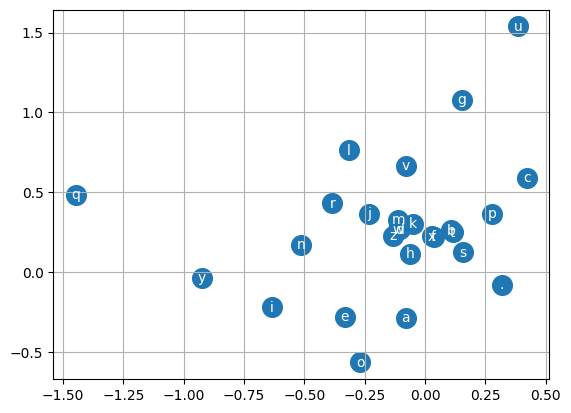

In [65]:
plt.figure()
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid()
plt.show()

Let's try increasing the dimensions of the encoding vector.

In [66]:
# Parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 150), generator=g)
b1 = torch.randn(150, generator=g)
W2 = torch.randn((150, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True
print(f'Number of parameters: {sum(p.nelement() for p in parameters)}')

lossi = []
BATCH_SIZE = 50

for k in range(30000):
    # Batch
    batch_ix = torch.randint(0, X_tr.shape[0], (BATCH_SIZE,))

    # Forward pass
    emb = C[X_tr[batch_ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_tr[batch_ix])

    lossi.append(loss.item())

    if k % 1000 == 0:
        print(f'Iteration: {k}, loss: {loss.item():.4f}')

    # Backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # Update parameters
    lr = 0.2
    for p in parameters:
        p.data += -lr * p.grad

Number of parameters: 8997
Iteration: 0, loss: 24.9372
Iteration: 1000, loss: 2.7954
Iteration: 2000, loss: 2.6388
Iteration: 3000, loss: 2.6312
Iteration: 4000, loss: 2.5654
Iteration: 5000, loss: 2.6390
Iteration: 6000, loss: 2.0417
Iteration: 7000, loss: 2.5104
Iteration: 8000, loss: 2.5588
Iteration: 9000, loss: 2.4598
Iteration: 10000, loss: 2.4423
Iteration: 11000, loss: 2.1763
Iteration: 12000, loss: 2.3671
Iteration: 13000, loss: 2.4143
Iteration: 14000, loss: 2.4910
Iteration: 15000, loss: 2.2922
Iteration: 16000, loss: 2.0496
Iteration: 17000, loss: 2.2034
Iteration: 18000, loss: 2.1715
Iteration: 19000, loss: 2.4722
Iteration: 20000, loss: 2.5533
Iteration: 21000, loss: 2.3532
Iteration: 22000, loss: 2.1969
Iteration: 23000, loss: 2.3634
Iteration: 24000, loss: 2.1338
Iteration: 25000, loss: 2.2477
Iteration: 26000, loss: 2.3895
Iteration: 27000, loss: 2.3637
Iteration: 28000, loss: 2.3752
Iteration: 29000, loss: 2.4483


In [67]:
emb = C[X_tr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_tr)
print(f'Training set loss: {loss:.4f}')
emb = C[X_dev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_dev)
print(f'Development set loss: {loss:.4f}')

Training set loss: 2.3872
Development set loss: 2.4108


Text(0, 0.5, 'Loss')

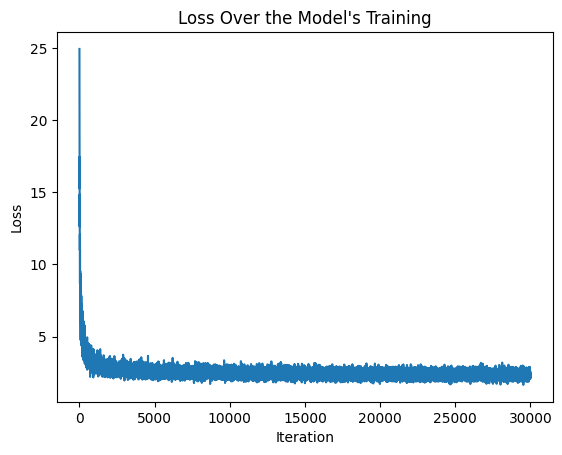

In [68]:
plt.figure()
plt.plot(lossi)
plt.title('Loss Over the Model\'s Training')
plt.xlabel('Iteration')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

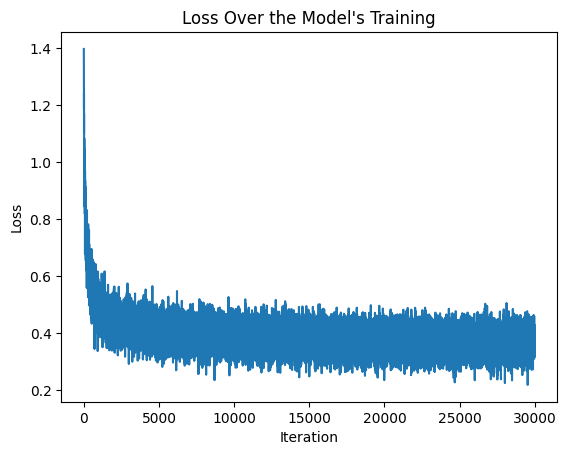

In [69]:
import math
plt.figure()
plt.plot([math.log10(l) for l in lossi])
plt.title('Loss Over the Model\'s Training')
plt.xlabel('Iteration')
plt.ylabel('Loss')

Let's make a general model with hyperparameters that can easily be tuned.

In [95]:
CHARACTERS_SIZE = len(itos)
BLOCK_SIZE = 5
EMBEDDING_SIZE = 15
HIDDEN_LAYER_SIZE = 300
BLOCK_EMBEDDING_SIZE = BLOCK_SIZE * EMBEDDING_SIZE
BATCH_SIZE = 1000
NUMBER_OF_ITERATIONS = 30_000
LEARNING_RATE = 1
DECAYED_LEARNING_RATE = 0.01

In [96]:
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_tr, Y_tr = build_dataset(words[:n1], BLOCK_SIZE)
X_dev, Y_dev = build_dataset(words[n1:n2], BLOCK_SIZE)
X_te, Y_te = build_dataset(words[n1:], BLOCK_SIZE)

In [97]:
# Parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((CHARACTERS_SIZE, EMBEDDING_SIZE), generator=g)
W1 = torch.randn((BLOCK_EMBEDDING_SIZE, HIDDEN_LAYER_SIZE), generator=g)
b1 = torch.randn(HIDDEN_LAYER_SIZE, generator=g)
W2 = torch.randn((HIDDEN_LAYER_SIZE, CHARACTERS_SIZE), generator=g)
b2 = torch.randn(CHARACTERS_SIZE, generator=g)

parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True
print(f'Number of parameters: {sum(p.nelement() for p in parameters)}')

lossi = []

for k in range(NUMBER_OF_ITERATIONS):
    # Batch
    batch_ix = torch.randint(0, X_tr.shape[0], (BATCH_SIZE,))

    # Forward pass
    emb = C[X_tr[batch_ix]]
    h = torch.tanh(emb.view(-1, BLOCK_EMBEDDING_SIZE) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_tr[batch_ix])

    lossi.append(loss.item())

    if k % 1000 == 0:
        print(f'Iteration: {k}, loss: {loss.item():.4f}')

    # Backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # Update parameters
    lr = LEARNING_RATE if k < NUMBER_OF_ITERATIONS / 2 else DECAYED_LEARNING_RATE
    for p in parameters:
        p.data += -lr * p.grad

Number of parameters: 31332
Iteration: 0, loss: 36.6656
Iteration: 1000, loss: 10.7352
Iteration: 2000, loss: 9.3925
Iteration: 3000, loss: 8.8497
Iteration: 4000, loss: 5.9271
Iteration: 5000, loss: 5.6906
Iteration: 6000, loss: 4.8043
Iteration: 7000, loss: 3.5563
Iteration: 8000, loss: 3.8009
Iteration: 9000, loss: 4.1180
Iteration: 10000, loss: 3.0808
Iteration: 11000, loss: 4.1119
Iteration: 12000, loss: 3.1736
Iteration: 13000, loss: 3.2090
Iteration: 14000, loss: 2.6590
Iteration: 15000, loss: 3.2737
Iteration: 16000, loss: 2.0610
Iteration: 17000, loss: 2.0334
Iteration: 18000, loss: 2.0451
Iteration: 19000, loss: 2.0616
Iteration: 20000, loss: 2.0200
Iteration: 21000, loss: 2.0516
Iteration: 22000, loss: 2.0494
Iteration: 23000, loss: 2.1053
Iteration: 24000, loss: 2.0856
Iteration: 25000, loss: 2.0308
Iteration: 26000, loss: 2.0548
Iteration: 27000, loss: 2.0509
Iteration: 28000, loss: 2.0863
Iteration: 29000, loss: 2.0253


In [98]:
emb = C[X_tr]
h = torch.tanh(emb.view(-1, BLOCK_EMBEDDING_SIZE) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_tr)
print(f'Training set loss: {loss:.4f}')
emb = C[X_dev]
h = torch.tanh(emb.view(-1, BLOCK_EMBEDDING_SIZE) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_dev)
print(f'Development set loss: {loss:.4f}')

Training set loss: 2.0286
Development set loss: 2.1115


Text(0, 0.5, 'Loss')

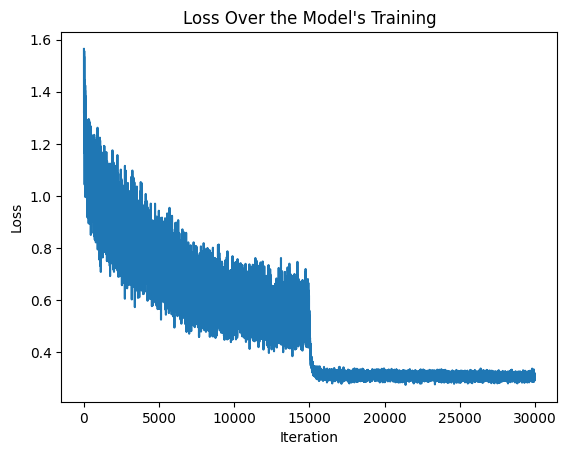

In [118]:
plt.figure()
plt.plot([math.log10(l) for l in lossi])
plt.title('Loss Over the Model\'s Training')
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [119]:
g = torch.Generator().manual_seed(2147483647)
for _ in range(20):
    out = []
    context = [0 for _ in range(BLOCK_SIZE)]
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(str().join(itos[i] for i in out))

junide.
jakari.
julisa.
welva.
kailn.
tolian.
juhtwan.
anaau.
amileah.
jedeya.
nowim.
lesson.
evyla.
terinoth.
thyfor.
majmer.
ashwah.
jaylyn.
reayren.
caryja.
